In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\Python Projects\Stroke Prediction\healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets Fill null-values of bmi columns

In [5]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [6]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

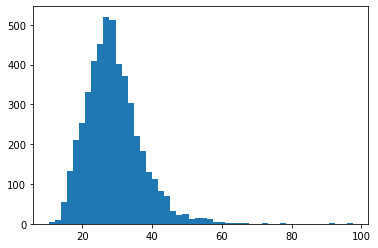

In [7]:
plt.hist(data['bmi'], bins=50)
plt.show()

In [8]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [9]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [10]:
data.bmi

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

Lets drop ID columns

In [11]:
data.drop('id', axis=1, inplace=True)

In [12]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Lets check outliers 

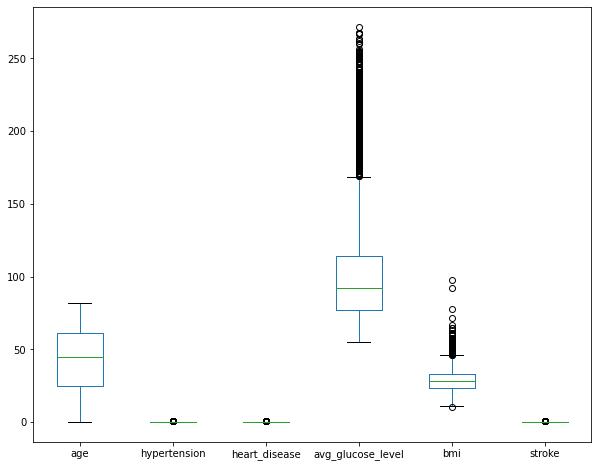

In [13]:
data.plot(kind='box', figsize=(10,8))
plt.show()

In [14]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

Number of outliers in **avg_glucose_level** is 1277 this is very much 

In [15]:
len(data[data['avg_glucose_level'] > 114.09000])

1277

# Label Encoding

Посмотрим какие колонки нам нужно привести к числовому виду

In [16]:
columns_for_encoding = [column for column in data.columns if data[column].dtype == 'object']
columns_for_encoding

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [17]:
data[columns_for_encoding].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Напишем простую функцию, которая заменяет наши колонки с типом данных 'object' на численные значения используя **LabelEncoder**


In [19]:
for cols in columns_for_encoding:
    data[cols] = encoder.fit_transform(data[cols])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [48]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


# Splitting data into train and test part

In [21]:
X = data.drop('stroke', axis=1)
y = data['stroke']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
X_train.shape[0], X_test.shape[0]

(4088, 1022)

## Let's  normalize our data

In [23]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [24]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [25]:
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

# Lets check the scaler object

In [37]:
import pickle
import os
# root = os.chdir(r'D:\Python Projects\Stroke Prediction/')

# Путь, где будет лежать созданный файл
scaler_path = os.path.join('D:/Python Projects/Stroke Prediction/', 'models/scaler123.pkl') 
with open(scaler_path, 'wb') as scaler_file: # Создает файл 
    pickle.dump(std, scaler_file) #  Записывает в файл информацию

# Training model

В качестве первой модели рассмотрим **Decision tree**

In [38]:
all_accuracy = []

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [40]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
tree.feature_importances_

array([0.01846011, 0.21490957, 0.03125091, 0.02262748, 0.00757322,
       0.04804503, 0.04001665, 0.30936514, 0.24253646, 0.06521542])

In [42]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [43]:
tree_pred = tree.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
tree_acc = accuracy_score(y_test, tree_pred)
print(tree_acc)
all_accuracy.append(tree_acc)

0.898238747553816


Сохраним модель **решающего дерева** в файл

In [49]:
import joblib
model_path = os.path.join('D:/Python Projects/Stroke Prediction/', 'models/decision_tree.sav')
joblib.dump(tree, model_path)

['D:/Python Projects/Stroke Prediction/models/decision_tree.sav']

Второй моделью будет **Logistic regression**

In [207]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [208]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [209]:
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [210]:
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print(log_reg_acc)
all_accuracy.append(log_reg_acc)

0.9461839530332681


Третьей моделью выберем **kNN**

In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [212]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [213]:
knn_pred = knn.predict(X_test_scaled)
knn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [214]:
knn_acc = accuracy_score(y_test, knn_pred)
print(knn_acc)
all_accuracy.append(knn_acc)

0.9422700587084148


Следующая модель будет **Random Forest**

In [215]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [216]:
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [217]:
forest_pred = forest.predict(X_test_scaled)
forest_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [218]:
forest_acc = accuracy_score(y_test, forest_pred)
print(forest_acc)
all_accuracy.append(forest_acc)

0.9461839530332681


Последняя модель будет **SVM**

In [219]:
from sklearn.svm import SVC # Support vector classifier
svc = SVC()

In [220]:
svc.fit(X_train_scaled, y_train)

SVC()

In [221]:
svc_pred = svc.predict(X_test_scaled)
svc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [222]:
svc_acc = accuracy_score(y_test, svc_pred)
print(svc_acc)
all_accuracy.append(svc_acc)

0.9461839530332681


Создадим таблицу с точностями соответствующие каждой из модели 

In [239]:
# pd.DataFrame(data = np.array(all_accuracy).reshape(1,5),
#              columns = ['Decision Tree', 'Logistic Regression', 'kNN', 'Random Forest', 'SVM'])

df = pd.DataFrame(data=all_accuracy,
             index=['Decision Tree', 'Logistic Regression', 'kNN', 'Random Forest', 'SVM'], 
             columns=['Accuracy'])
df.sort_values('Accuracy', ascending = False)

,Accuracy
Logistic Regression,0.946184
Random Forest,0.946184
SVM,0.946184
kNN,0.942270
Decision Tree,0.901174


Построим гистограмму с точностей

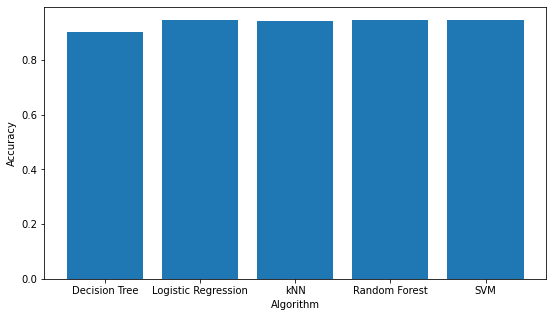

In [249]:
plt.figure(figsize=(9, 5))
plt.bar(['Decision Tree', 'Logistic Regression', 'kNN', 'Random Forest', 'SVM'], 
        all_accuracy)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()